In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
y_values_10_raw_df = pd.read_csv("overlap_10.csv", parse_dates=["timestamp"])
y_values_20_raw_df = pd.read_csv("overlap_20.csv", parse_dates=["timestamp"])

def newest_overlaps(df: pd.DataFrame, col_suffix: str) -> pd.DataFrame:
    df = df.copy()
    df["samples"] = df["samples"].astype(int)
    df["overlap"] = df["overlap"].astype(float)
    idx = df.groupby("samples")["timestamp"].idxmax()
    out = df.loc[idx, ["samples", "overlap"]].sort_values("samples").reset_index(drop=True)
    return out.rename(columns={"overlap": f"overlap_{col_suffix}"})

y_values_10_latest_df = newest_overlaps(y_values_10_raw_df, "10")
y_values_20_latest_df = newest_overlaps(y_values_20_raw_df, "20")

display_df = (
    y_values_10_latest_df.merge(y_values_20_latest_df, on="samples", how="outer")
    .sort_values("samples")
    .reset_index(drop=True)
)

display_df.style.format({"overlap_10": "{:.3f}", "overlap_20": "{:.3f}"})

,samples,overlap_10,overlap_20
0,50,0.599,0.570
1,100,0.606,0.578
2,200,0.622,0.594
3,500,0.638,0.603
4,1000,0.682,0.602
5,2000,0.915,0.619
6,5000,0.991,0.726
7,10000,0.996,0.982
8,20000,1.001,0.999
9,50000,1.001,1.001


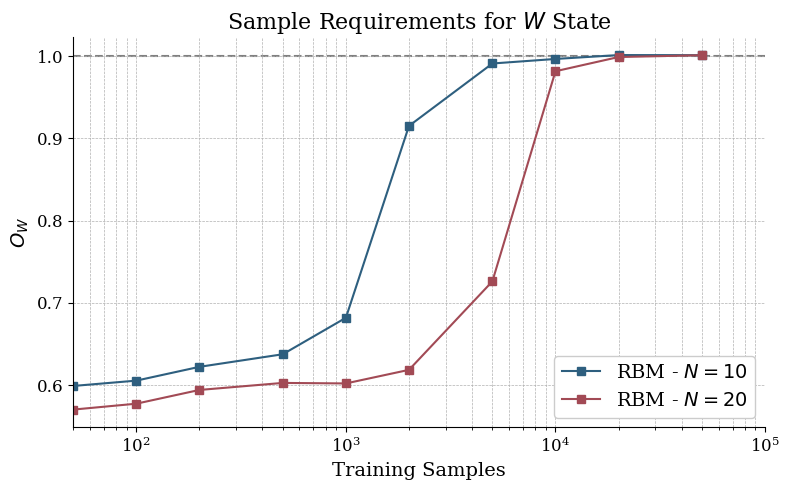

In [9]:
# Map merged DF to the old variable names
x_values = display_df["samples"].to_numpy(dtype=int)
y_values_small = display_df["overlap_10"].to_numpy(dtype=float)  # N=10
y_values = display_df["overlap_20"].to_numpy(dtype=float)        # N=20

# Apply the desired style and update label text
plt.rcParams.update({"font.family": "serif"})

fig, ax = plt.subplots(figsize=(8, 5), facecolor='white')
ax.set_facecolor('white')

# Plot
ax.plot(x_values, y_values_small, 's-', color='#2e5f7f', label=r'RBM - $N = 10$', zorder=2)
ax.plot(x_values, y_values, 's-', color='#a24a55', label=r'RBM - $N = 20$', zorder=2)

# Labels and title
ax.set_xscale('log')
ax.set_xlabel("Training Samples", fontsize=14)
ax.set_ylabel(r"$O_W$", fontsize=14)
ax.set_title("Sample Requirements for $W$ State", fontsize=16)

# Add horizontal reference line at 1.0
ax.axhline(y=1.0, linestyle='--', color='gray', linewidth=1.5, zorder=1)

# Ticks and grid
ax.tick_params(axis='both', labelsize=12)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Legend
ax.legend(frameon=True, framealpha=1, loc='best', fontsize=14)

# Remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# extend x range to include 1e6.....axis
ax.set_xlim(left=50, right=1e5)

# Final layout
plt.tight_layout()
# save it
plt.savefig("training_performance_vanilla_w_state.png", dpi=300, bbox_inches='tight')
plt.show()